# Student ID: 18203485
# Name : Fergus Mc Hale

# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

import time
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.ticker import NullFormatter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Task 1 (CS5062)

Follow the examples in the notebook Lab 3 - Clustering and Manifold Learning.ipynb to cluster loans_dataset_et3.csv with the k-Means clustering algorithm and visualise the clustering. Use an appropriate feature-scaling technique and pick a value of k suggested by MDS and t-SNE visualisations of the dataset. Experiment with various values of the parameters of k-Means. Aim at producing a meaningful clustering that allows you to describe the clusters with words. Write a short conclusion about the characteristics of the clusters (max 250 words).

In [37]:
etv3_df = pd.read_csv("./loans_dataset_et3.csv")

In [38]:
etv3_data = np.array(etv3_df.values, dtype=float)
print('(number of examples, number of attributes): ', etv3_data.shape)

(number of examples, number of attributes):  (332, 5)


In [39]:
numerical_cat = etv3_df._get_numeric_data().columns

In [40]:
len(numerical_cat)

5

In [41]:
def display_field_info(category_type):
    if(len(category_type) > 0):
        for key in category_type:
            print("\n______\t",key,"\t_________")
            print("Total Values = \t",etv3_df[key].count(),"\n")
            print(etv3_df[key].value_counts())
            print("_________________________________________")

In [42]:
display_field_info(numerical_cat)


______	 ApplicantIncome 	_________
Total Values = 	 332 

2500     6
6250     4
8333     4
6000     3
3500     3
2583     2
14583    2
3466     2
2333     2
2600     2
3750     2
3173     2
2666     2
9323     2
3333     2
3000     2
5417     2
3859     2
4166     2
4583     2
5703     2
3159     2
2479     2
4000     2
3083     2
5000     2
5800     1
14880    1
4750     1
3246     1
        ..
1875     1
2900     1
4950     1
3927     1
3417     1
17500    1
5468     1
2400     1
5285     1
2917     1
4009     1
2920     1
3406     1
3917     1
3667     1
3400     1
4188     1
5955     1
2882     1
2083     1
3902     1
3900     1
4923     1
10750    1
8072     1
4408     1
3073     1
4917     1
3316     1
3691     1
Name: ApplicantIncome, Length: 296, dtype: int64
_________________________________________

______	 CoapplicantIncome 	_________
Total Values = 	 332 

0.0        141
5625.0       3
2500.0       3
1666.0       3
2531.0       2
2250.0       2
1459.0       2
2054.0       

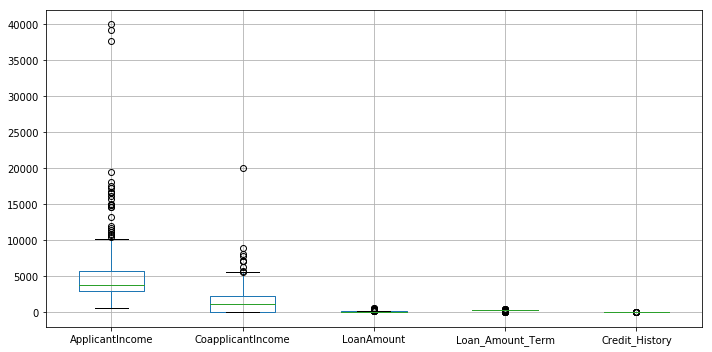

In [43]:
etv3_df.boxplot(figsize=(10,5))

plt.tight_layout()
plt.show()

In [44]:
etv3_df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [45]:
etv3_df.tail(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
327,5417,4196.0,267,360,1
328,16666,0.0,275,360,1
329,10750,0.0,312,360,1
330,5955,5625.0,315,360,1
331,6133,3906.0,324,360,1


In [46]:
etv3_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [47]:
qt_scaler = preprocessing.QuantileTransformer()
etv3_data = qt_scaler.fit_transform(etv3_df)

In [48]:
def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

In [49]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

In [50]:
k = 3

In [51]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(etv3_data)

In [52]:
etv3_data_and_centers = np.r_[etv3_df,clustered_data_sklearn.cluster_centers_]

In [53]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(etv3_data_and_centers)
print("transformation complete")

transformation complete


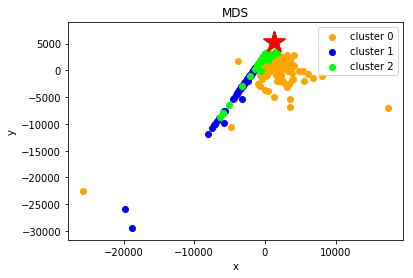

In [54]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')

In [55]:
XYcoordinates = manifold.TSNE(n_components=k).fit_transform(etv3_data_and_centers)
print("transformation complete")

transformation complete


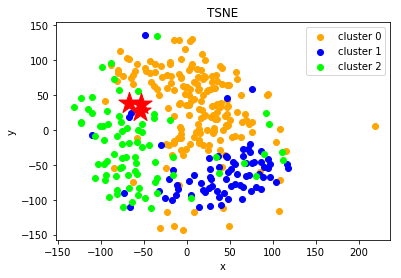

In [56]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

In [57]:
etv3_df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=etv3_df.index)

In [58]:
etv3_df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,3886.792135,2726.404494,142.786517,349.887640,0.977528
1,9365.855263,31.315789,198.842105,337.105263,0.960526
2,4142.423077,113.191282,80.064103,327.538462,1.000000


# Task 2 (CS5062)

* Plot the sum of squared distances from the data points (in loans_dataset_et3.csv) to the centers of the k-Means clusters for various values of k. 
* Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. If these methods suggest a different value of k (from the one you used in Task 1), then compute a new k-Means clustering.
* Use another clustering algorithm (from the ones available in scikit-learn) for the same dataset and an appropriate manifold-learning technique to visualise it.
* Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words) and by visualising the clusterings with an appropriate manifold-learning technique.

In [59]:
def plot_kmeans(kmeans, X, n_clusters=3, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

# KNN

For n_clusters = 2 The average silhouette_score is : 0.3717353085258766


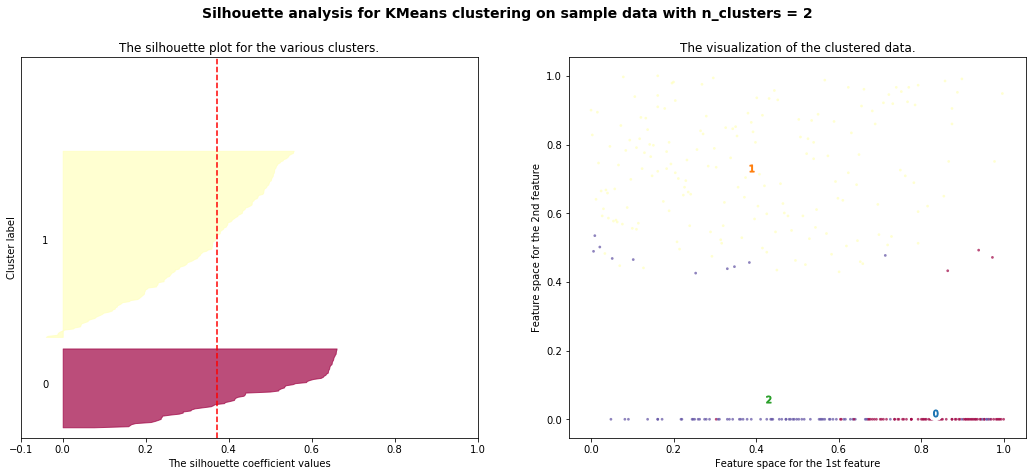

For n_clusters = 3 The average silhouette_score is : 0.36771328092326816


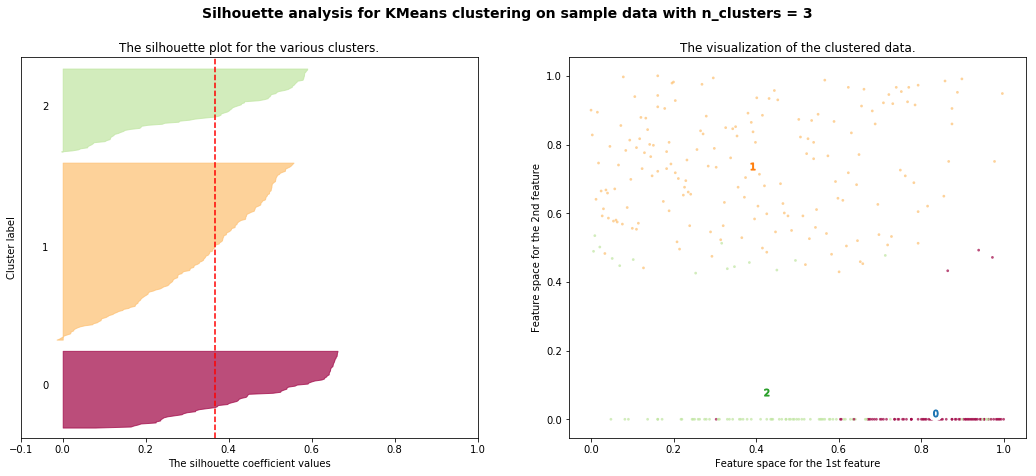

For n_clusters = 4 The average silhouette_score is : 0.3728304402314477


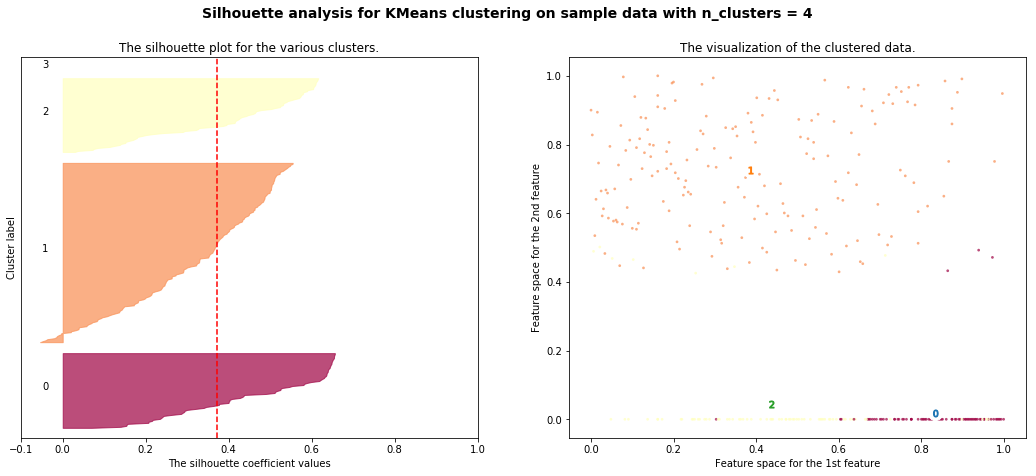

For n_clusters = 5 The average silhouette_score is : 0.36771328092326816


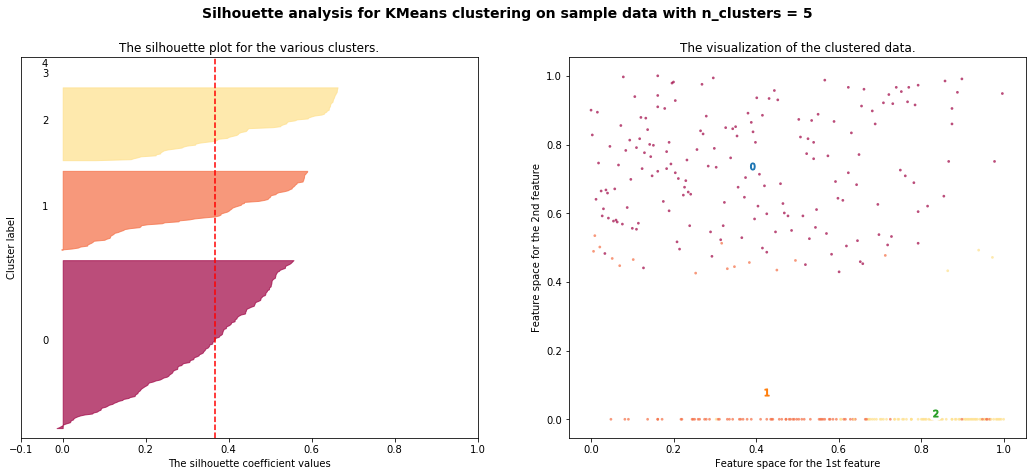

For n_clusters = 6 The average silhouette_score is : 0.3678110779032611


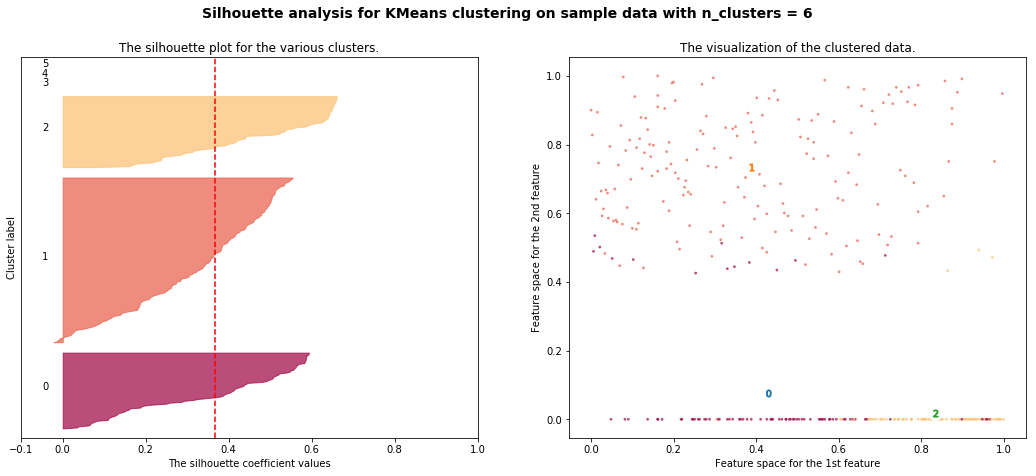

For n_clusters = 7 The average silhouette_score is : 0.3728304402314477


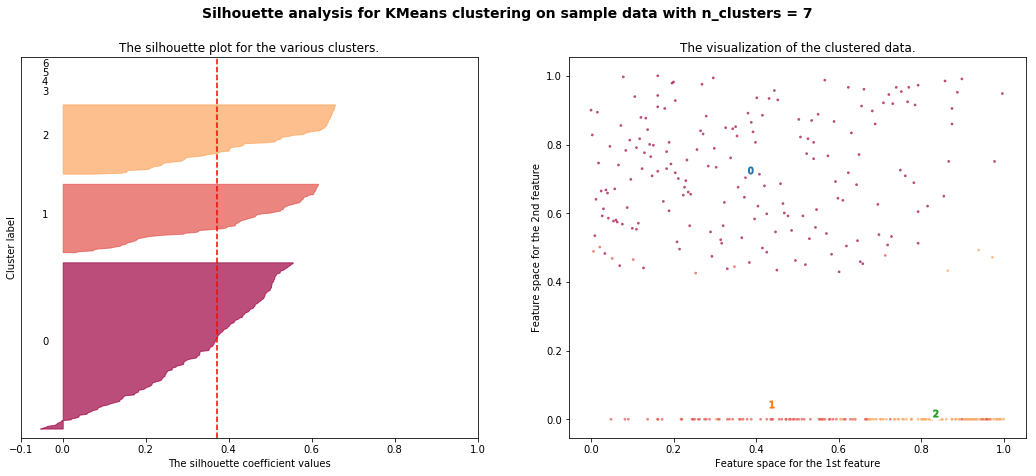

For n_clusters = 8 The average silhouette_score is : 0.3728304402314477


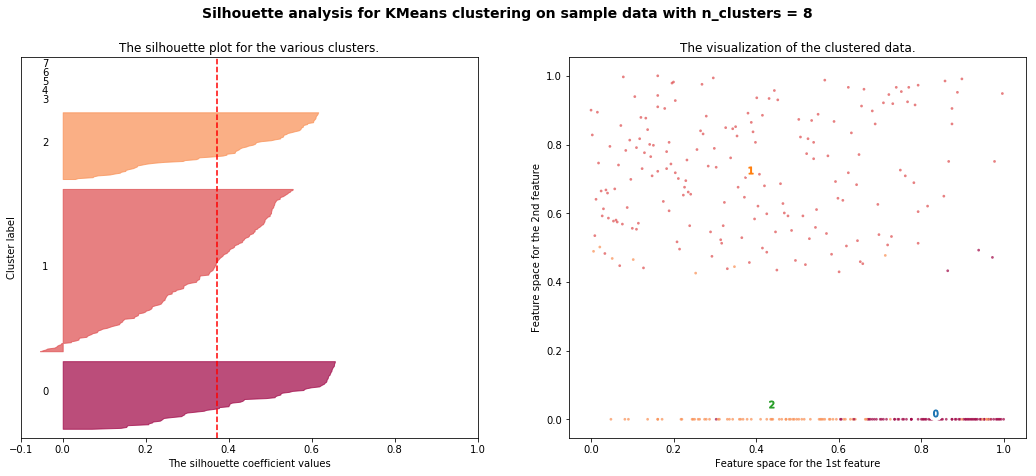

For n_clusters = 9 The average silhouette_score is : 0.3717353085258766


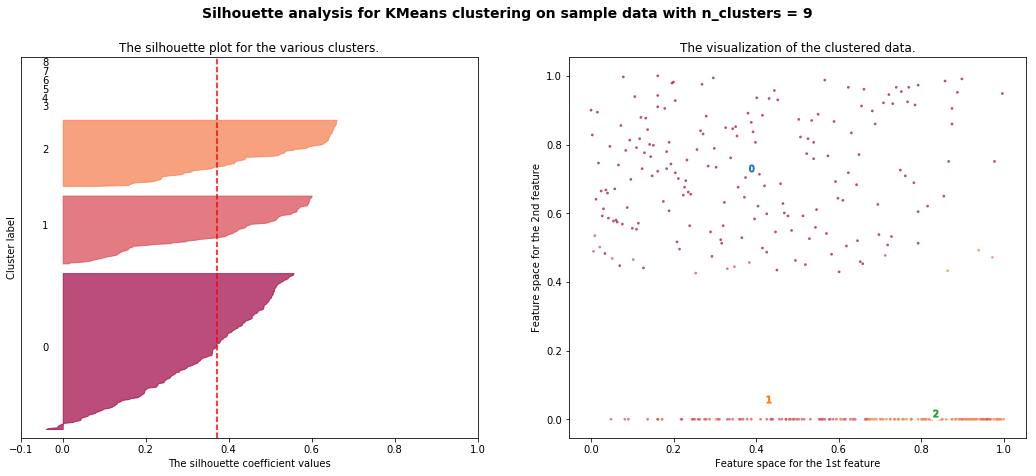

In [60]:
cluster_range = range(2,10)

for n_clusters in cluster_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(etv3_data) + (n_clusters + 1) * 10])
    
    clusterer = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(etv3_data)
    cluster_labels = clusterer.fit_predict(etv3_data)

    silhouette_avg = silhouette_score(etv3_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(etv3_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.Spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(etv3_data[:, 0], etv3_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
              marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

# KNN Elbow

In [61]:
cluster_range = range(1, 20)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = cluster.KMeans(n_clusters=num_clusters, n_init=10, max_iter=1000)
  clusters.fit( etv3_data )
  cluster_errors.append( clusters.inertia_ )

In [62]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [63]:
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,117.935654
1,2,70.783555
2,3,54.512641
3,4,40.442020
4,5,35.137094
5,6,32.776695
6,7,28.075794
7,8,25.253373
8,9,23.424695
9,10,21.369481


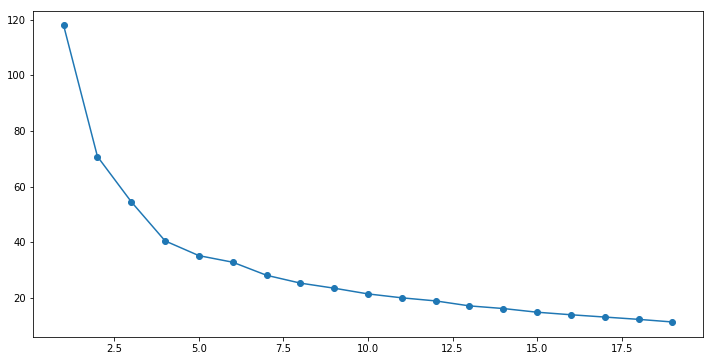

In [64]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# AgglomerativeClustering

In [69]:
knn_graph = kneighbors_graph(etv3_data, 10, include_self=False)

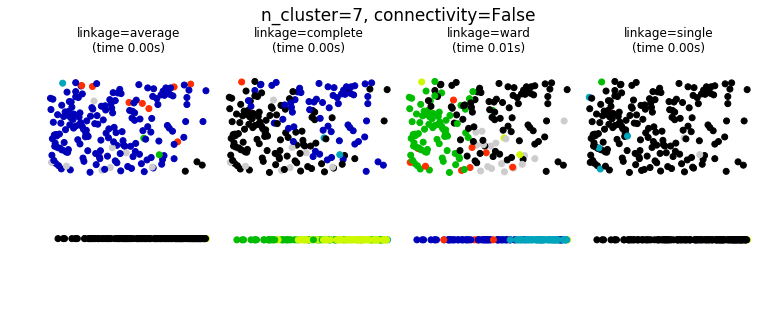

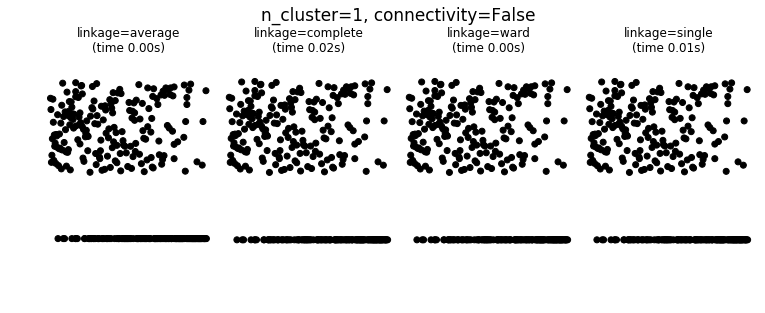

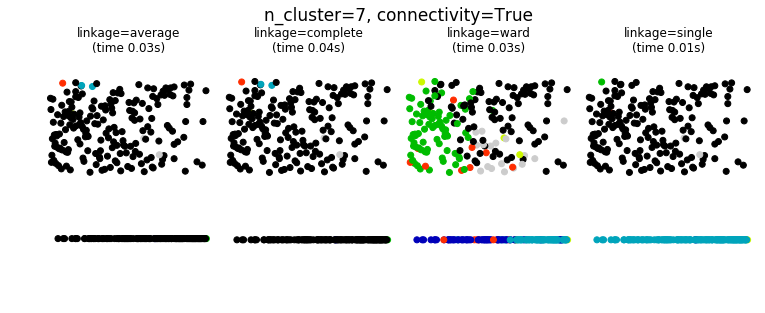

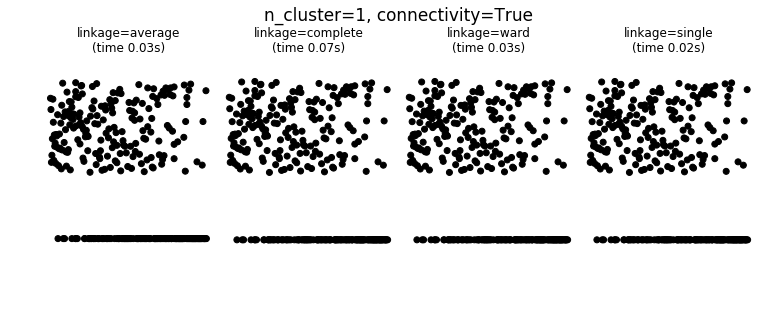

In [71]:
for connectivity in (None, knn_graph):
    for n_clusters in (7, 1):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(etv3_data)
            elapsed_time = time.time() - t0
            plt.scatter(etv3_data[:, 0], etv3_data[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s\n(time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

For n_clusters = 2 The average silhouette_score is : 0.34916918096926036


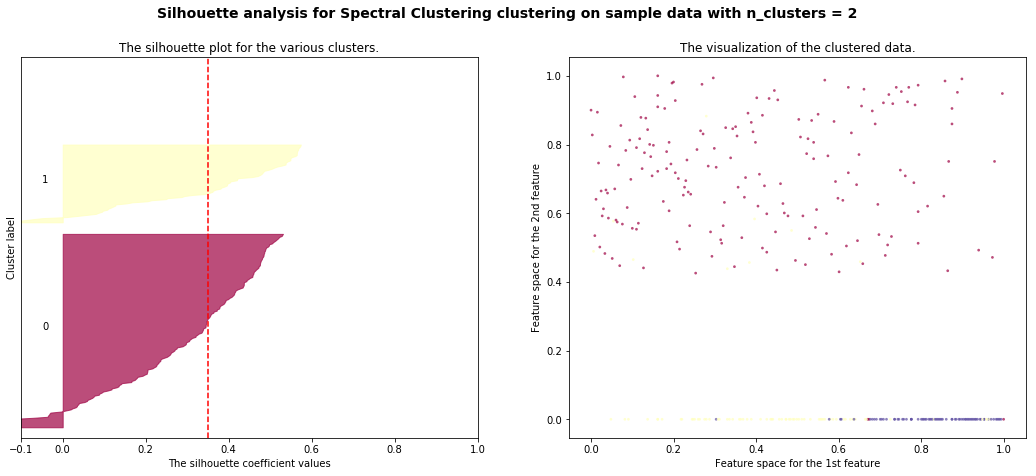

For n_clusters = 3 The average silhouette_score is : 0.34916918096926036


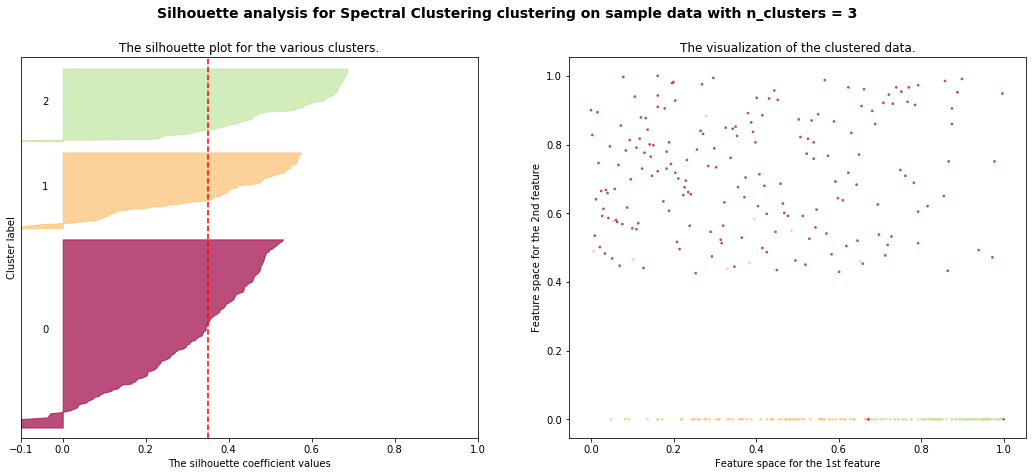

For n_clusters = 4 The average silhouette_score is : 0.34916918096926036


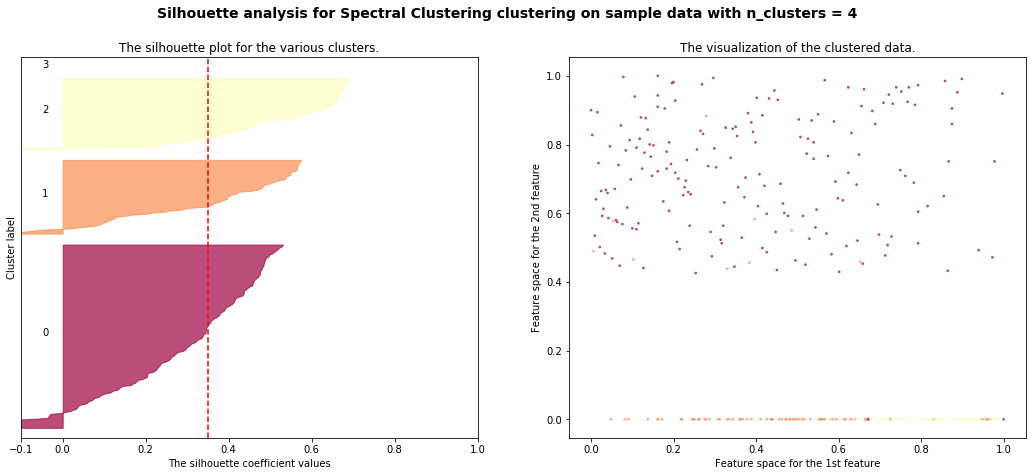

For n_clusters = 5 The average silhouette_score is : 0.34916918096926036


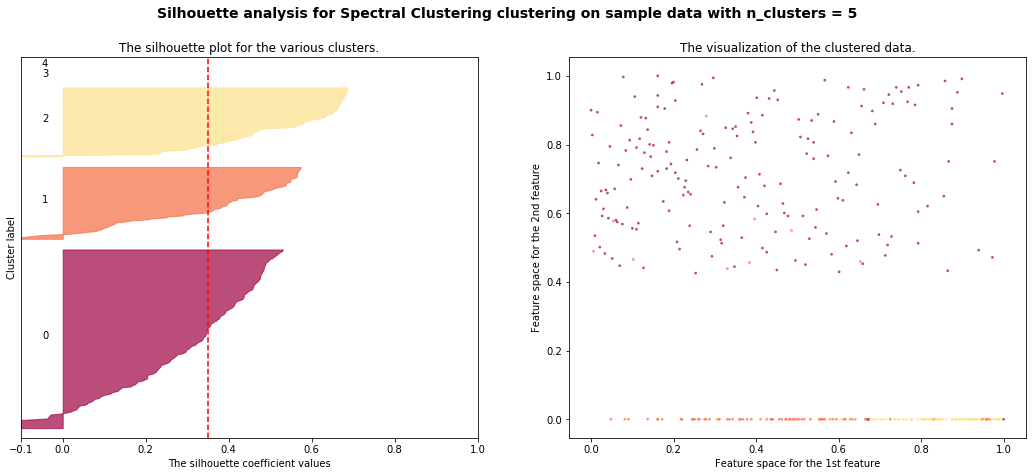

For n_clusters = 6 The average silhouette_score is : 0.34916918096926036


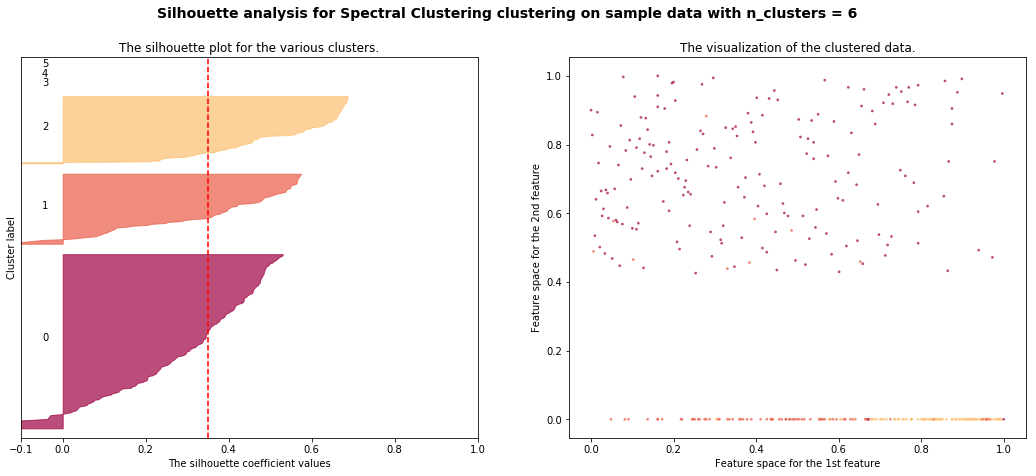

For n_clusters = 7 The average silhouette_score is : 0.34916918096926036


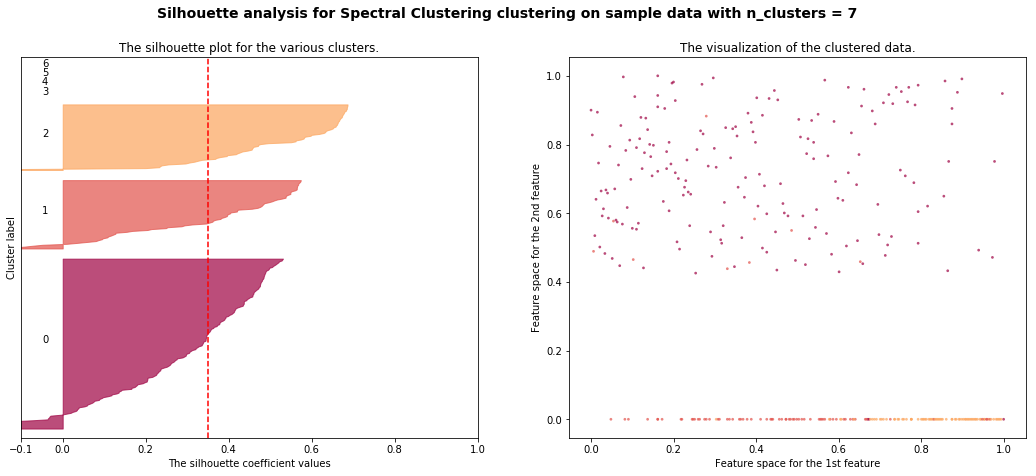

For n_clusters = 8 The average silhouette_score is : 0.34916918096926036


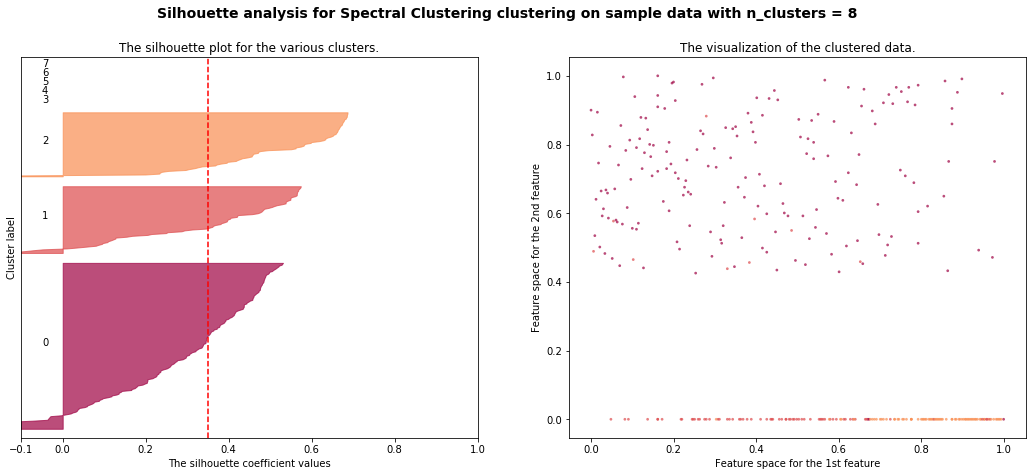

For n_clusters = 9 The average silhouette_score is : 0.34916918096926036


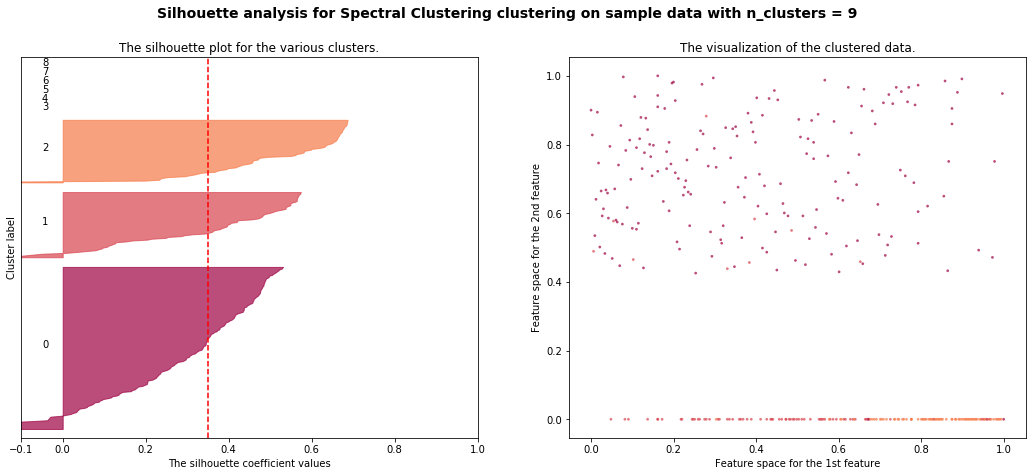

In [31]:
cluster_range = range(2,10)

for n_clusters in cluster_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(etv3_data) + (n_clusters + 1) * 10])
    
    clusterer = cluster.AgglomerativeClustering(n_clusters=k).fit(etv3_data)
    cluster_labels = clusterer.fit_predict(etv3_data)

    silhouette_avg = silhouette_score(etv3_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(etv3_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.Spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(etv3_data[:, 0], etv3_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Spectral Clustering clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

# Spectral Embedding - Manifold

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


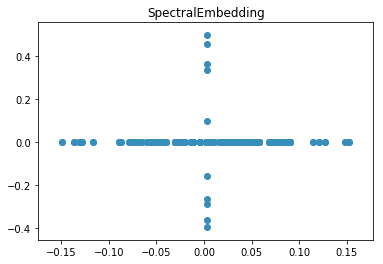

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


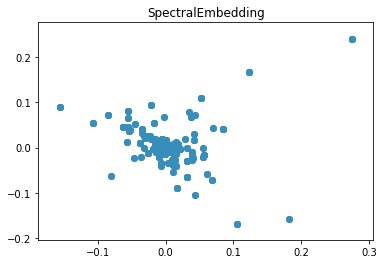

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


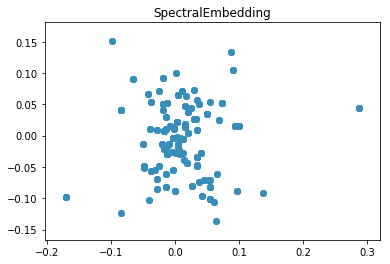

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


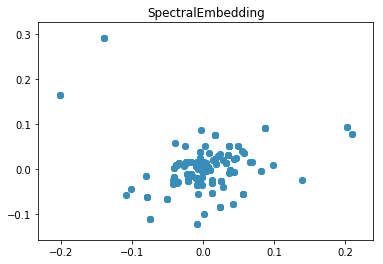

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


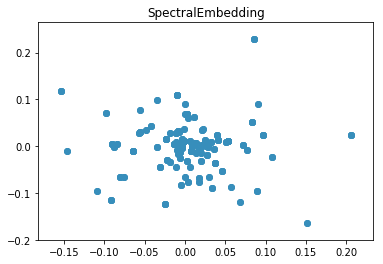

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


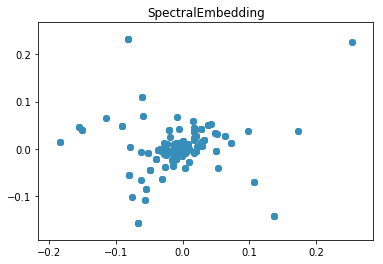

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


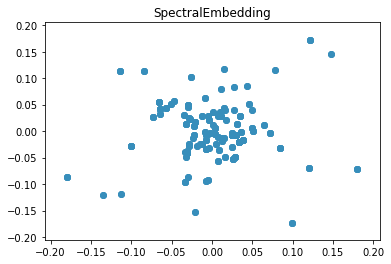

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


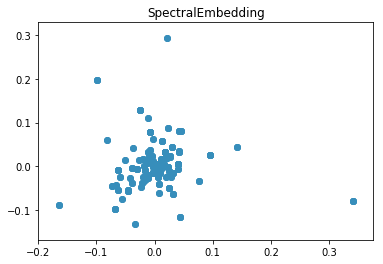

In [32]:
n_neighbors = 2
for n in range(2,10):
    plt.figure()
    se = manifold.SpectralEmbedding(n_components=n,n_neighbors=n_neighbors)
    Y = se.fit_transform(etv3_data)
    ax = fig.add_subplot(259)
    plt.clf()
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("SpectralEmbedding")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.34509243437244674


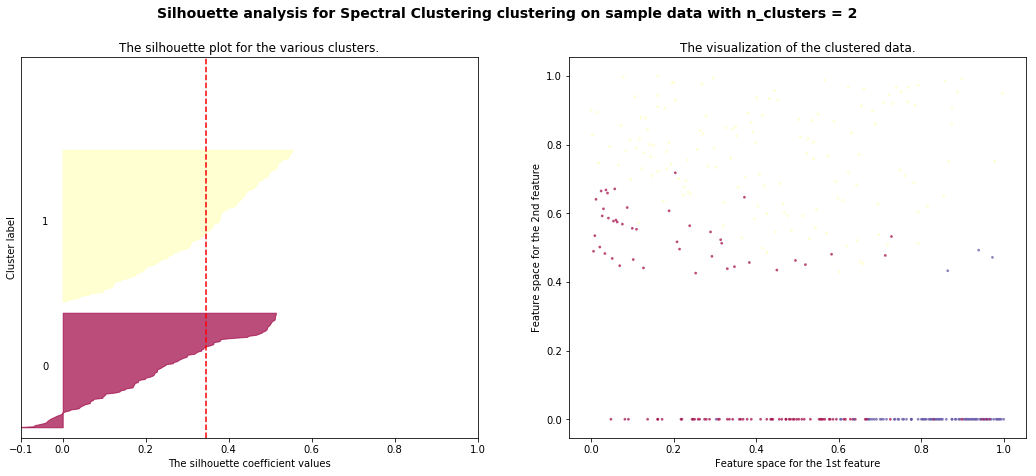

For n_clusters = 3 The average silhouette_score is : 0.34509243437244674


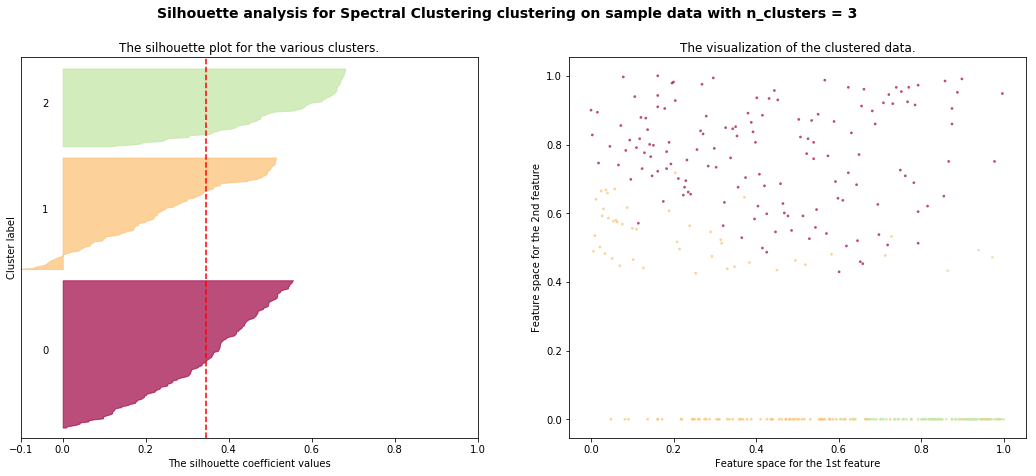

For n_clusters = 4 The average silhouette_score is : 0.34509243437244674


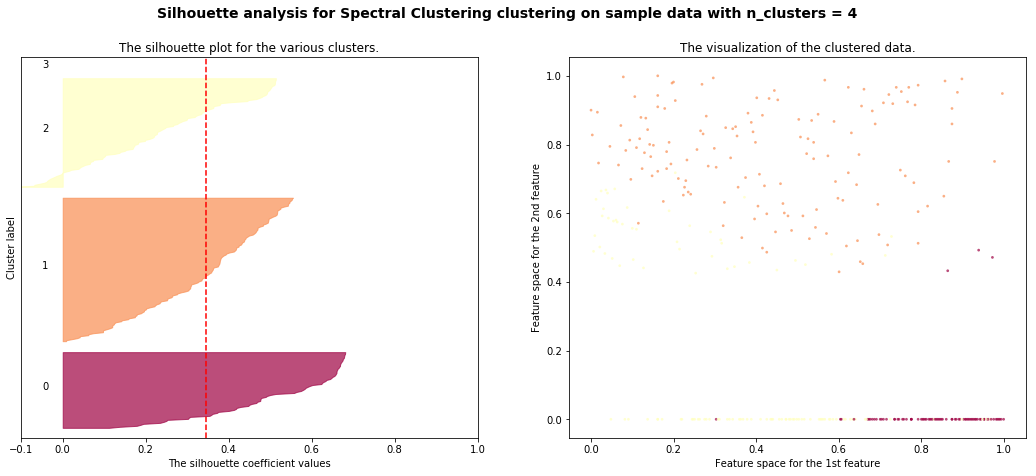

For n_clusters = 5 The average silhouette_score is : 0.34509243437244674


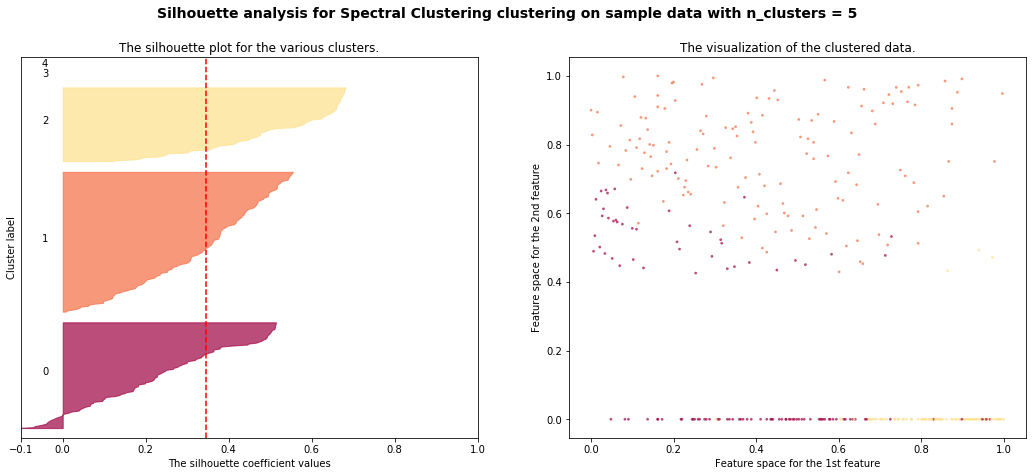

For n_clusters = 6 The average silhouette_score is : 0.34509243437244674


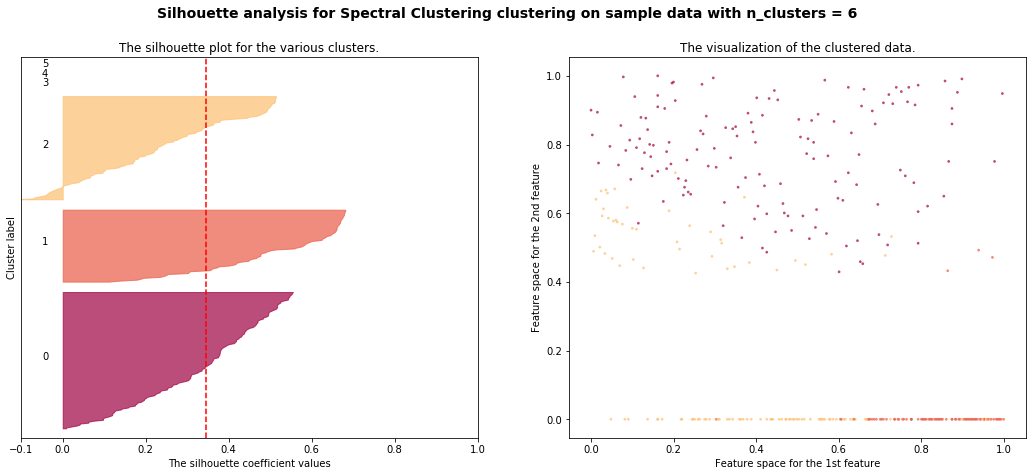

For n_clusters = 7 The average silhouette_score is : 0.34509243437244674


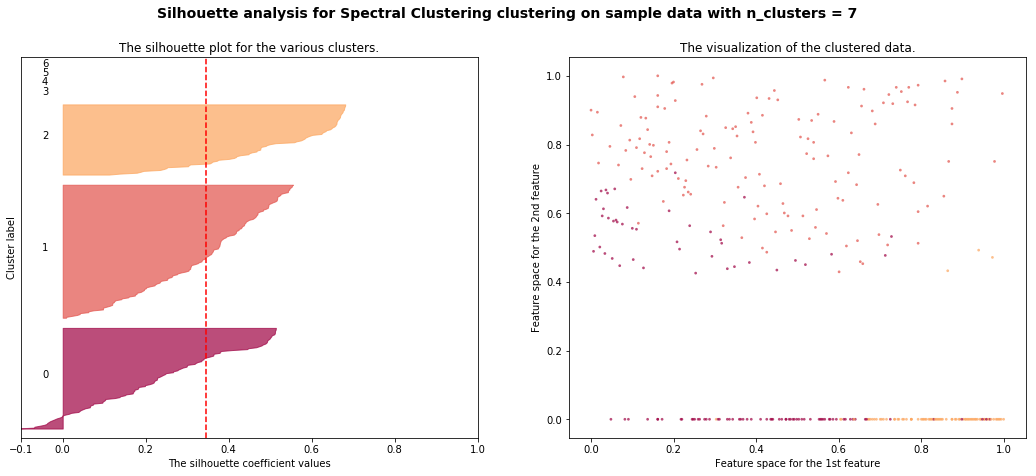

For n_clusters = 8 The average silhouette_score is : 0.34509243437244674


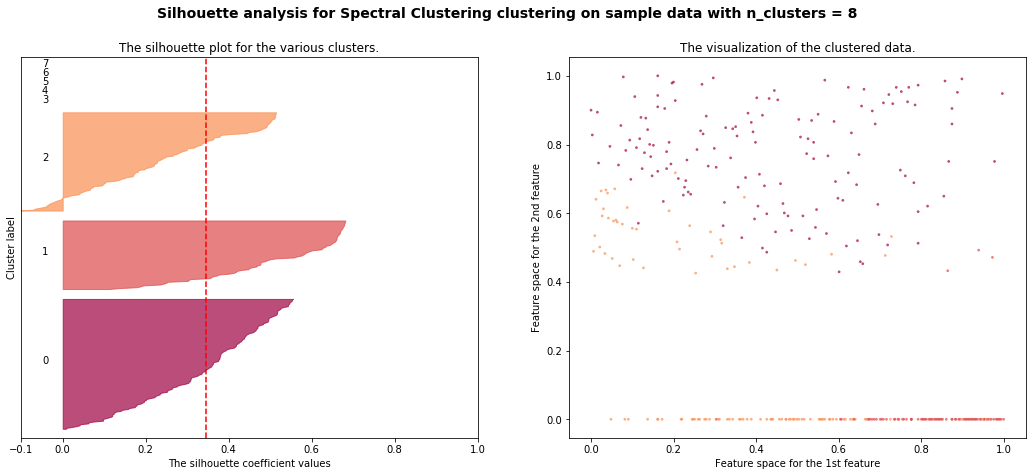

For n_clusters = 9 The average silhouette_score is : 0.34509243437244674


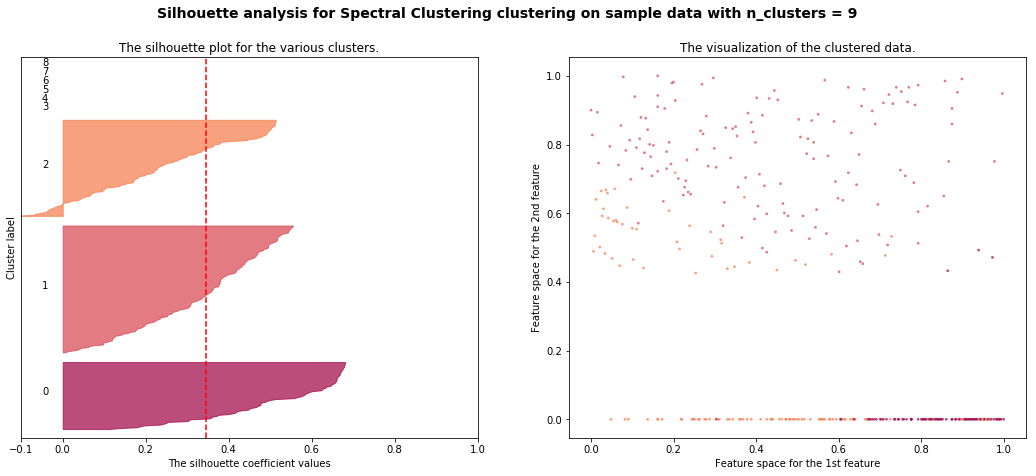

In [33]:
cluster_range = range(2,10)

for n_clusters in cluster_range:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(etv3_data) + (n_clusters + 1) * 10])
    
    clusterer = cluster.SpectralClustering(n_clusters=k, n_init=10).fit(etv3_data)
    cluster_labels = clusterer.fit_predict(etv3_data)

    silhouette_avg = silhouette_score(etv3_data, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(etv3_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
          sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.Spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(etv3_data[:, 0], etv3_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
              c=colors)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for Spectral Clustering clustering on sample data "
                "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

    plt.show()

# Iso Map - Manifold

* degrees of freedom to do with the data
* Non Linear similar to PCA
* underlying global geometry of the data using local metric information 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


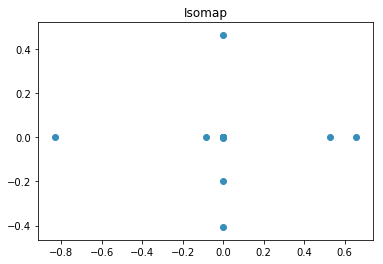

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


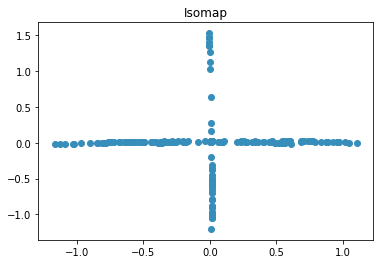

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


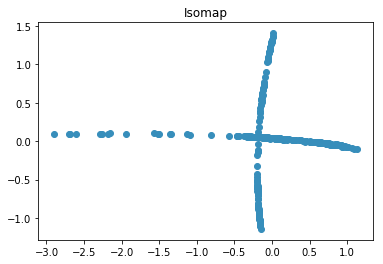

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


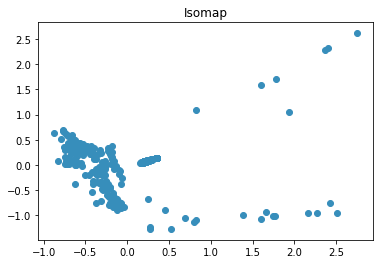

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


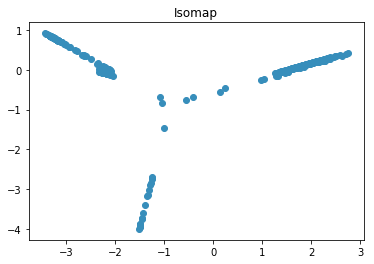

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


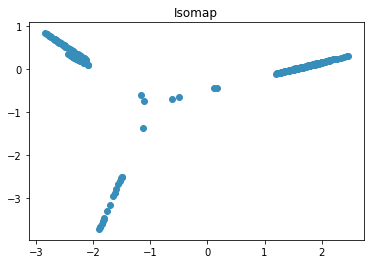

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


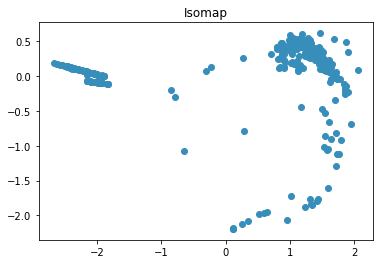

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


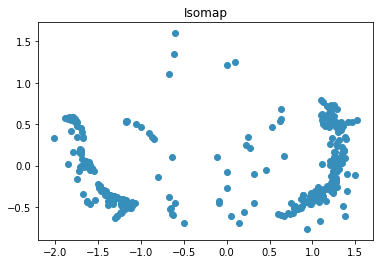

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


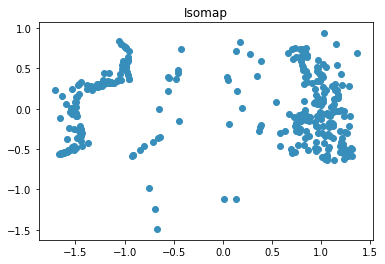

In [34]:
n_components = 2
for n in range(1,10):
    plt.figure()
    Y = manifold.Isomap(n, n_components).fit_transform(etv3_data)
    ax = fig.add_subplot(257)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("Isomap")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()

* [1] [Maniflold Learning PyData] (https://www.youtube.com/watch?v=j8080l9Pvic)
* [2] [Euclidean Distance] (https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy)
* [3] [Manifold Learning Scikitlearn] (https://scikit-learn.org/stable/modules/manifold.html)
* [4] [Manifold Learning Github] (https://github.com/cc-skuehn/Manifold_Learning/)
* [5] [Cluster Validation] (http://www.awesomestats.in/python-cluster-validation/)
* [6] [Silhouette Analysis] (https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)
* [7] [Elbow method] (https://pythonprogramminglanguage.com/kmeans-elbow-method/)
* [8] [Clustering Algos] (https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
* [9] [Spectral Clustering] (https://scikitlearn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)
* [10] [Dimension Reduction] (https://people.eecs.berkeley.edu/~efros/courses/AP06/presentations/ThompsonDimensionalityReduction.pdf)
